In [10]:
if(!require(lattice)) { install.packages("lattice"); library(lattice) }
if(!require(mvtnorm)) { install.packages("mvtnorm"); library(mvtnorm) }
if(!require(numDeriv)) { install.packages("numDeriv"); library(numDeriv) }
if(!require(ellipse)) { install.packages("ellipse"); library(ellipse) }
if(!require(grDevices)) { install.packages("grDevices"); library(grDevices) }
if(!require(wesanderson)) { install.packages("wesanderson"); library(wesanderson) }

In [11]:
plotTrajectory <- function (start) {
  current_gen = start
  polygon(ellipse(0.8, centre = current_gen, level = 0.3), col = wes_palette("Royal1")[1])
  segments(current_gen[1] - v1[1], current_gen[2] - v1[2],
           current_gen[1] + v1[1], current_gen[2] + v1[2], lwd = 2)
  segments(current_gen[1] - v2[1], current_gen[2] - v2[2],
           current_gen[1] + v2[1], current_gen[2] + v2[2], lwd = 2)
  points(current_gen[1], current_gen[2], pch = 19)
  net_beta = c(0, 0)
  for(i in 1:gen){
    beta = grad(W_bar, t(current_gen))
    net_beta = net_beta + beta
    next_gen = current_gen + G%*%beta
    arrows(current_gen[1], current_gen[2],
           next_gen[1], next_gen[2], pch = 18, length = 0.14, lwd = 2.5, col = "black")
    arrows(current_gen[1], current_gen[2],
           current_gen[1] + beta[1]/5, current_gen[2] + beta[2]/5,
           pch = 18, length = 0.14, lwd = 3, col = wes_palette("Rushmore")[3])
    current_gen = next_gen
  }
  arrows(start[1], start[2],
         start[1] + net_beta[1]/5, start[2] + net_beta[2]/5,
         pch = 18, length = 0.14, lwd = 2.5, col = wes_palette("FantasticFox")[5])
#  net_delta = G %*% net_beta
#  arrows(start[1], start[2],
#         start[1] + net_delta[1], start[2] + net_delta[2],
#         pch = 18, length = 0.14, lwd = 2.5, col = 'black')
}

In [12]:
w_cov = matrix(c(1.0, 0.7,
                 0.7, 1.0), ncol = 2)
G = matrix(c(1.0, 0.8,
             0.8, 1.0)/2, ncol = 2)

es = eigen(cov2cor(G))$values
v1 = sqrt(es[1])/1.2 * eigen(cov2cor(G))$vectors[,1]
v2 = sqrt(es[2])/1.2 * eigen(cov2cor(G))$vectors[,2]

gen = 8    # Número de gerações
step = 0.1 # Resolução da superfície

mypalette = colorRampPalette(c(wes_palette(10, name = "Zissou", type = "continuous"), "darkred"))

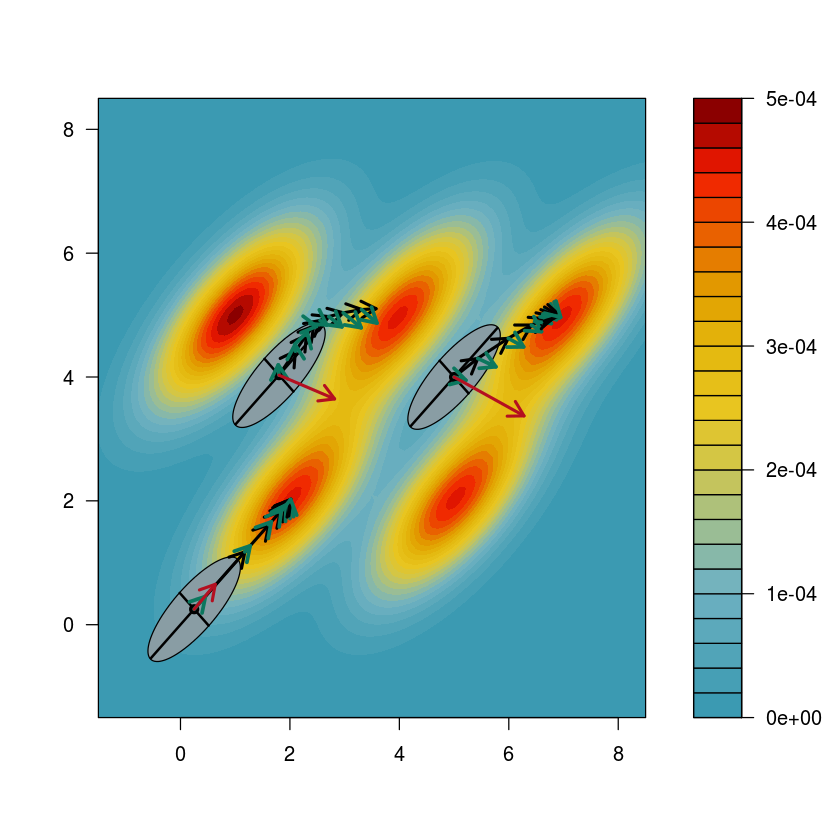

In [13]:
#################################
# Multiple Peaks
#################################

W_bar = function(x) {
    log(
    dmvnorm(x, mean = c(4, 5), sigma = w_cov) +
    1.1*dmvnorm(x, mean = c(1, 5), sigma = w_cov) +
    dmvnorm(x, mean = c(2, 2), sigma = w_cov) +
    dmvnorm(x, mean = c(7, 5), sigma = w_cov) +
    dmvnorm(x, mean = c(5, 2), sigma = w_cov))
}
x <- seq(-1.5, 8.5, step) ## valores para mu
y <- seq(-1.5, 8.5, step)
X <- as.matrix(expand.grid(x, y))
Z <- vector()
for(i in 1:nrow(X)){
  Z[i] <- W_bar(c(X[i,1], X[i,2]))
}
Z = exp(Z - log(sum(exp(Z))))
b <- matrix(Z, length(x))

filled.contour(x, y, z = b, color.palette = mypalette,
               plot.axes = {
                 axis(1);
                 axis(2);
                 plotTrajectory(c( 1.8,4.03))
                 plotTrajectory(c(0.25,0.25))
                 plotTrajectory(c(5   ,4   ))
               })


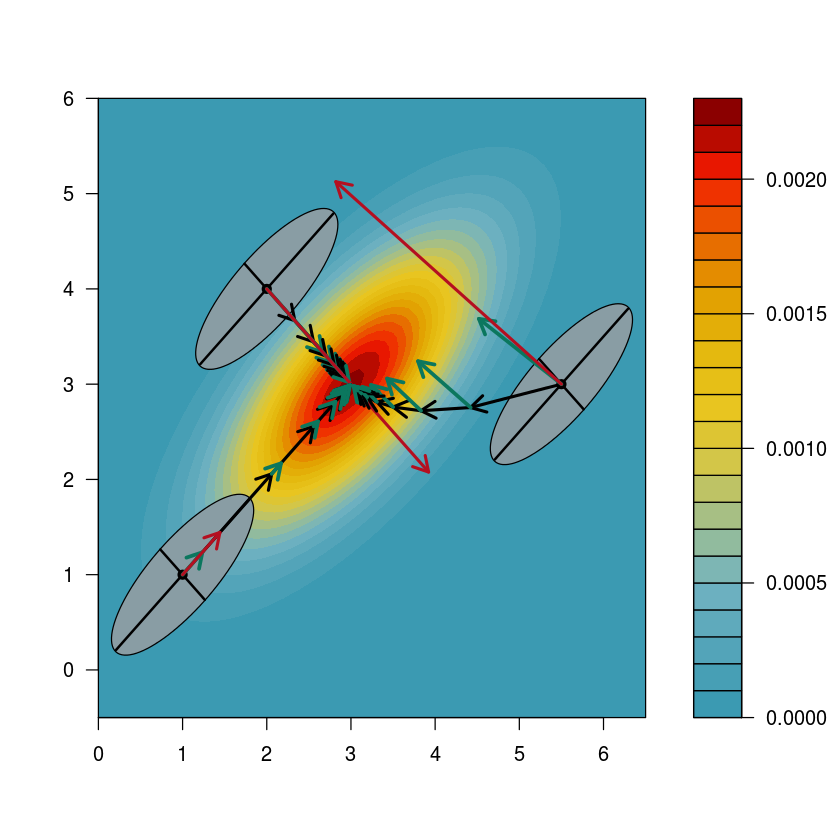

In [14]:
#################################
# Single Peak
#################################

W_bar = function(x) {
  log(dmvnorm(x, mean = c(3, 3), sigma = w_cov))
}

x <- seq(0, 6.5, step) ## valores para mu
y <- seq(-0.5, 6, step)
X <- as.matrix(expand.grid(x, y))
Z <- vector()
for(i in 1:nrow(X)){
  Z[i] <- W_bar(c(X[i,1], X[i,2]))
}
Z = exp(Z - log(sum(exp(Z))))
b <- matrix(Z, length(x))

filled.contour(x, y, z = b, color.palette = mypalette,
               plot.axes = {
                 axis(1);
                 axis(2);
                 plotTrajectory(c(2,4))
                 plotTrajectory(c(1,1))
                 plotTrajectory(c(5.5,3))
               }
)
